In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import scipy.sparse

#### load TF-IDF Features & Label

In [3]:
# Load TF-IDF Features
X_train = scipy.sparse.load_npz("D:/Projects/Sentiment_Analysis/data/features/TF_IDF/X_train_tfidf.npz")
X_dev   = scipy.sparse.load_npz("D:/Projects/Sentiment_Analysis/data/features/TF_IDF/X_dev_tfidf.npz")

# Load TF-IDF Labels
y_train = pd.read_csv("D:/Projects/Sentiment_Analysis/data/processed/train_clean.csv")["sentiment"]
y_dev   = pd.read_csv("D:/Projects/Sentiment_Analysis/data/processed/dev_clean.csv")["sentiment"]

#### Check distribution label (optional)

In [4]:
print("Label distribution (train):")
print(y_train.value_counts())
print("\nLabel distribution (dev):")
print(y_dev.value_counts())

Label distribution (train):
sentiment
2    5643
0    5325
1     458
Name: count, dtype: int64

Label distribution (dev):
sentiment
2    1590
0    1409
1     167
Name: count, dtype: int64


#### Initialize and Train Logistic Regression

In [5]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


#### Predict on dev set

In [6]:
y_pred = nb_model.predict(X_dev)

### Evaluate results

In [7]:
print("Accuracy:", accuracy_score(y_dev, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_dev, y_pred))
print("\nClassification Report:\n", classification_report(y_dev, y_pred, digits=4))

Accuracy: 0.8310170562223625

Confusion Matrix:
 [[1248    0  161]
 [  96    4   67]
 [ 208    3 1379]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8041    0.8857    0.8430      1409
           1     0.5714    0.0240    0.0460       167
           2     0.8581    0.8673    0.8627      1590

    accuracy                         0.8310      3166
   macro avg     0.7446    0.5923    0.5839      3166
weighted avg     0.8190    0.8310    0.8108      3166



#### Model results

Overall performance:

**Accuracy** = 0.831 → quite good, especially for a simple linear model like Naive Bayes.

However, the F1 macro = 0.5839 is low, showing a performance imbalance between classes.

Analysis by class:

**Class 0** (negative or neutral): Precision = 0.80, Recall = 0.89 → the model predicts well, quite reliably in this class.

**Class 2** (positive): Precision = 0.86, Recall = 0.87 → the model also handles this class well.

**Class 1** (mixed or neutral): Precision = 0.57, Recall = 0.02 → extremely poor. The model almost does not recognize this class (most of the class 1 samples are mistakenly predicted as 0 or 2).

#### Visualize the results:

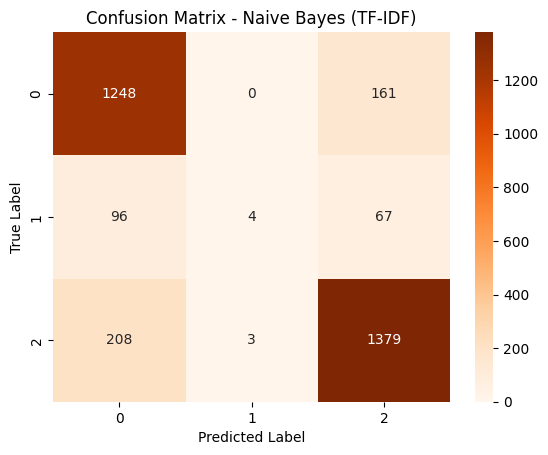

In [8]:
cm = confusion_matrix(y_dev, y_pred, labels=nb_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes (TF-IDF)")
plt.show()

The TF-IDF + Naive Bayes model achieves relatively good accuracy (83%), however, the neutral class classification ability is weak due to data imbalance and limitations of the TF-IDF representation. In the next step, it is recommended to try data balancing techniques and modern semantic models such as PhoBERT to evaluate the improvement compared to the traditional TF-IDF.

#### Save model

In [9]:
joblib.dump(nb_model, "D:/Projects/Sentiment_Analysis/models/TF-IDF/tfidf_nb_model.pkl")
print("Model saved to models/tfidf_nb_model.pkl")

Model saved to models/tfidf_nb_model.pkl
